In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from seismiqb import plot_loss

In [3]:
x = np.linspace(1, 100, 1000)

oscillation = lambda x: np.sin(x) / x + np.random.normal(scale=0.1, size=len(x))

y0 = -np.log(x) * np.random.rand() + oscillation(x)
y1 = -np.log(x) * np.random.rand() + oscillation(x)

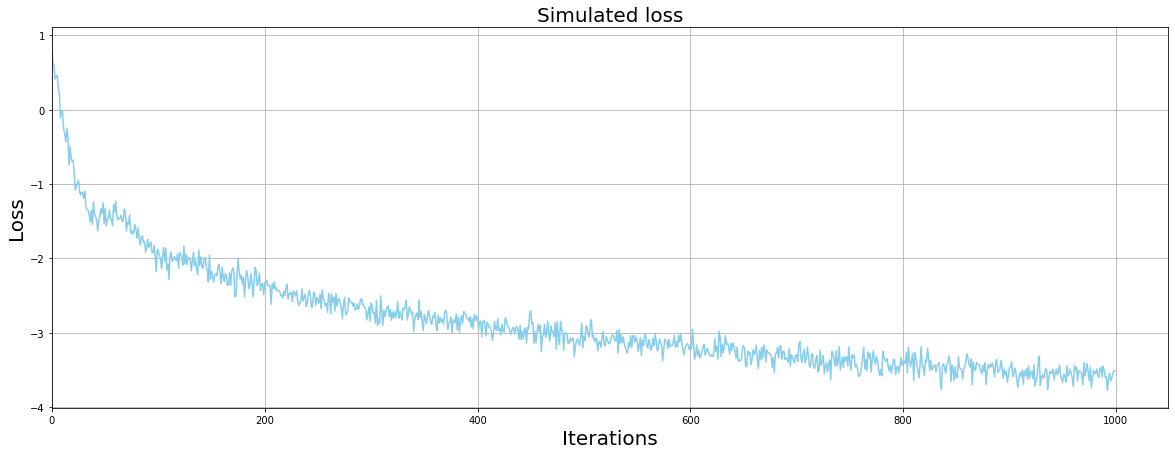

In [4]:
figure_params = {
    'figsize': (20, 7)
}

annotation_params = {
    'title_label': 'Simulated loss'
}

plot_loss(y0, **figure_params, **annotation_params)

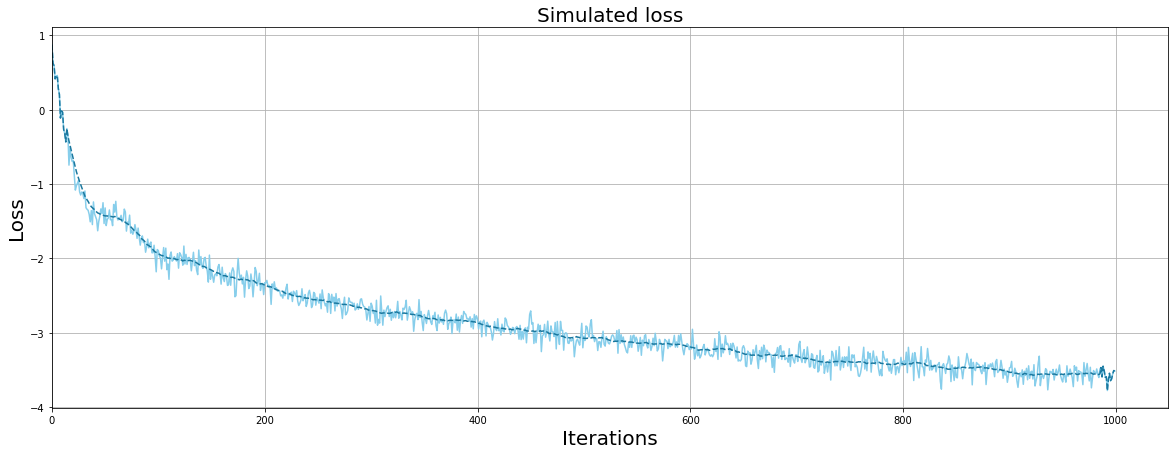

In [5]:
curve_params = {'rolling_mean': 30}

plot_loss(y0, **figure_params, **curve_params, **annotation_params)

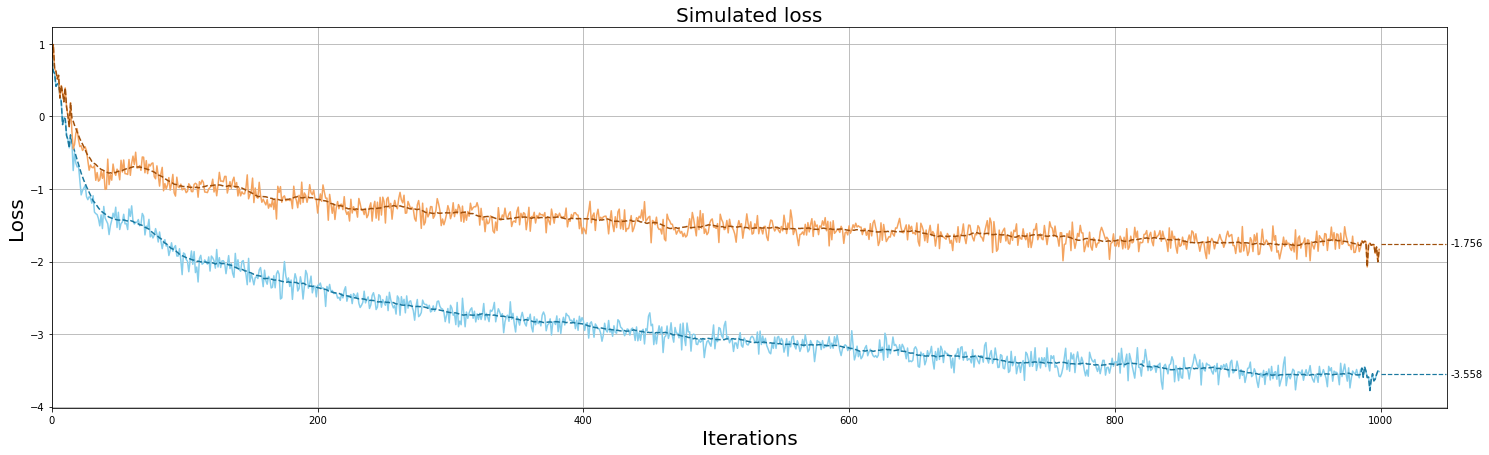

In [11]:
curve_params['final_mean'] = 100

plot_loss([y0, y1], **figure_params, **curve_params, **annotation_params)

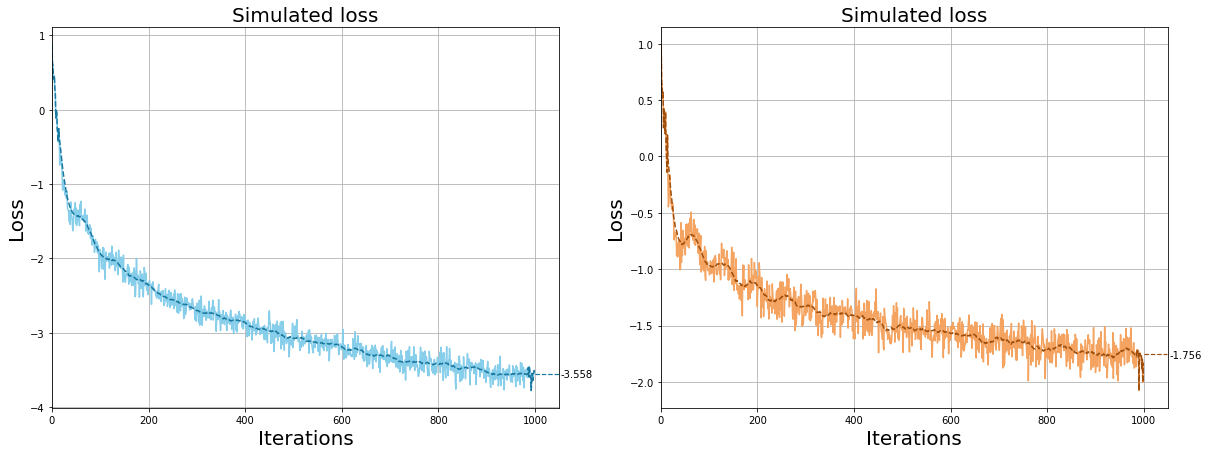

In [7]:
plot_loss([y0, y1], separate=True, **figure_params, **curve_params, **annotation_params)

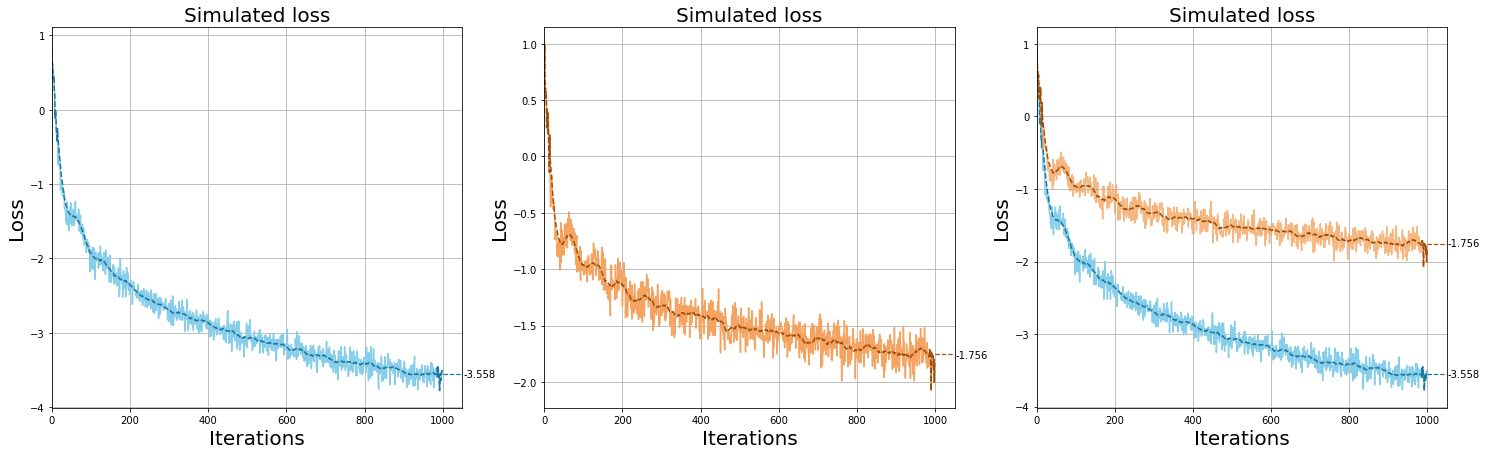

In [8]:
figure_params['figsize'] = (25, 7)

color_0, color_1 = 'skyblue', 'sandybrown'
curve_params['color'] = [color_0, color_1, [color_0, color_1]]
curve_params['alpha'] = [1., 1., [1., .8]]

plot_loss([y0, y1, [y0, y1]], **figure_params, **curve_params, **annotation_params)